# Tensorflow version 2.12.0 사용

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

tf.__version__

'2.12.0'

# numpy data type [[참고]](https://engineer-mole.tistory.com/85)
-  Numpy배열 ndarray는 dtype으로 저장되어, <code>np.array()</code>로 ndarray오브젝트를 생성할 때 지정하거나 <code>astype()메소드</code>로 변경하거나 하는 것이 가능하다.
- 기본적으로 하나의 ndarray오브젝트에 대해 하나의 dtype가 설정되어 있으며, 모든 요소가 같은 데이터 형이 된다.
> - unit8 : 부호 없는 8비트 정수형
> - floag32 : 실수형; 단 정밀도 부동소수점형
- astype()을 사용한 데이터형 dtype 변환 (캐스트)
> - <code>x_train.astype(np.float32)</code>

In [7]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()   # 데이터 불러오기 

x_train=x_train.reshape(-1, 32, 32, 3)   # 텐서로 변환 ( -1, 높이, 너비, 채널) colar data로 RGB 3개 채널 
x_test=x_test.reshape(-1, 32, 32, 3)     # 텐서로 변환 ( -1, 높이, 너비, 채널) colar data로 RGB 3개 채널

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

print(x_train.dtype)

x_train = x_train.astype(np.float32) / 255.0  # 정규화 
x_test = x_test.astype(np.float32) / 255.0    # 정규화 

print(type(x_train))
print(x_train.dtype)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)
uint8
<class 'numpy.ndarray'>
float32


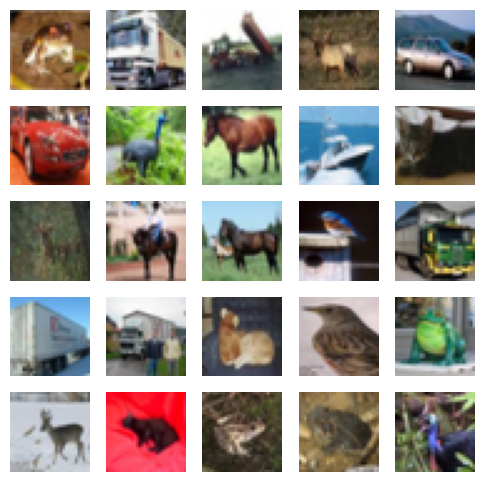

In [5]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index]) 
    plt.axis('off')   
    # plt.title(str(t_train[index]))

plt.show()

In [6]:
import pandas as pd

DF=pd.DataFrame(y_train) # 정답(레이블)값이 정수. 
DF.head()

,0
0,6
1,9
2,9
3,4
4,1


<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/21-7.png" style="max-width: 60%; height: auto;"> <p>


In [10]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3),
               filters=32, activation='relu', padding='valid'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))      # 은닉층 
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))    # 출력층 

In [11]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1605760   
                                                      

In [12]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test), verbose=1)

Epoch 1/30
391/391 [==============================] - 44s 111ms/step - loss: 1.6596 - accuracy: 0.3942 - val_loss: 1.2696 - val_accuracy: 0.5504
Epoch 2/30
391/391 [==============================] - 43s 110ms/step - loss: 1.3376 - accuracy: 0.5222 - val_loss: 1.1179 - val_accuracy: 0.6197
Epoch 3/30
391/391 [==============================] - 44s 112ms/step - loss: 1.2092 - accuracy: 0.5697 - val_loss: 1.0415 - val_accuracy: 0.6372
Epoch 4/30
391/391 [==============================] - 42s 108ms/step - loss: 1.1272 - accuracy: 0.6005 - val_loss: 0.9972 - val_accuracy: 0.6567
Epoch 5/30
391/391 [==============================] - 41s 106ms/step - loss: 1.0696 - accuracy: 0.6169 - val_loss: 0.9463 - val_accuracy: 0.6685
Epoch 6/30
391/391 [==============================] - 41s 106ms/step - loss: 1.0201 - accuracy: 0.6352 - val_loss: 0.9145 - val_accuracy: 0.6819
Epoch 7/30
391/391 [==============================] - 42s 107ms/step - loss: 0.9805 - accuracy: 0.6502 - val_loss: 0.9235 - val_ac

In [13]:
cnn.evaluate(x_test, y_test,verbose=2)

313/313 - 3s - loss: 0.9332 - accuracy: 0.7109 - 3s/epoch - 9ms/step


[0.9331515431404114, 0.7109000086784363]

In [16]:
import pandas as pd

history_DF=pd.DataFrame(hist.history)
history_DF

,loss,accuracy,val_loss,val_accuracy
0,1.659581,0.39416,1.269582,0.5504
1,1.337636,0.52218,1.117888,0.6197
2,1.209190,0.56972,1.041540,0.6372
3,1.127200,0.60054,0.997222,0.6567
4,1.069595,0.61694,0.946272,0.6685
5,1.020074,0.63516,0.914525,0.6819
6,0.980522,0.65018,0.923522,0.6802
7,0.946971,0.66092,0.892603,0.6879
8,0.910248,0.67362,0.884811,0.6911
9,0.881411,0.68276,0.898776,0.6920


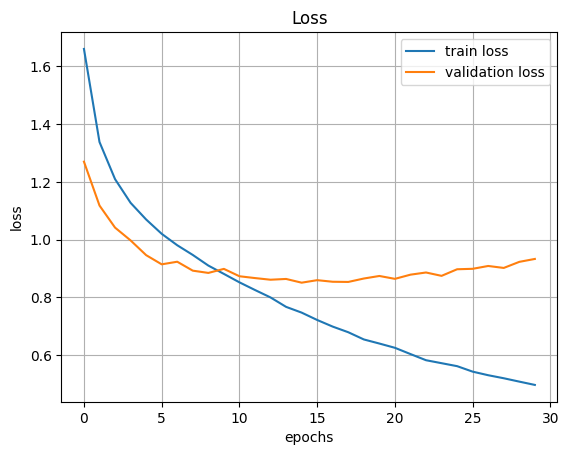

In [17]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

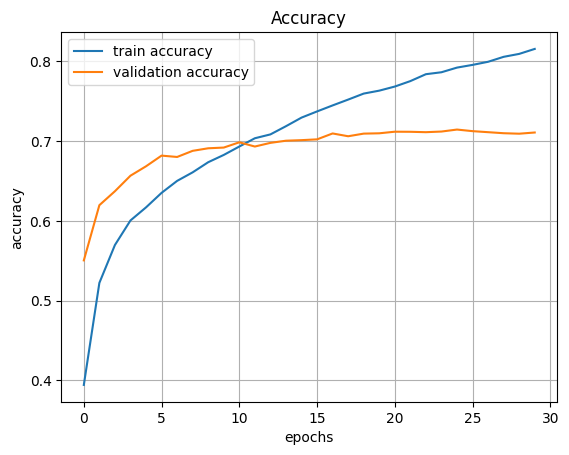

In [18]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()